# Traffic Light Detection and Classification - Udacity CarND Capstone
Using a pre-trained model to detect objects in an image.

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


## Object detection imports

Here are the imports from the object detection module.

In [2]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

/home/ec2-user/TrafficSignClassifier/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    ap

## Model preparation

In [3]:
faster_rcnn_model = 'faster-rcnn-frozen-sim/frozen_inference_graph.pb'
PATH_TO_LABELS = "label_map.pbtxt"
NUM_CLASSES = 4

In [4]:
# faster_rcnn_model = 'faster-rcnn-frozen-real/frozen_inference_graph.pb'
# PATH_TO_LABELS = "label_map.pbtxt"
# NUM_CLASSES = 4

In [5]:
# faster_rcnn_model = 'faster-rcnn-traffic-bosch-frozen/frozen_inference_graph.pb'
# PATH_TO_LABELS = 'bosch_label_map.pbtxt'
# NUM_CLASSES = 13

## Loading label map

Label maps map indices to category names, so that when our convolution network predicts 2, we know that this corresponds to Red. Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine.

In [6]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [7]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [8]:
from glob import glob

## Detection

## 2. Testing Faster RCNN Models

### 2.1 Testing model trained on simulator on simulator images

In [11]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
  od_graph_def = tf.GraphDef()

  with tf.gfile.GFile(faster_rcnn_model, 'rb') as fid:
        
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [12]:
PATH_TO_TEST_IMAGES_DIR = 'test_images_sim'

print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

test_images_sim/*.jpg
Length of test images: 12


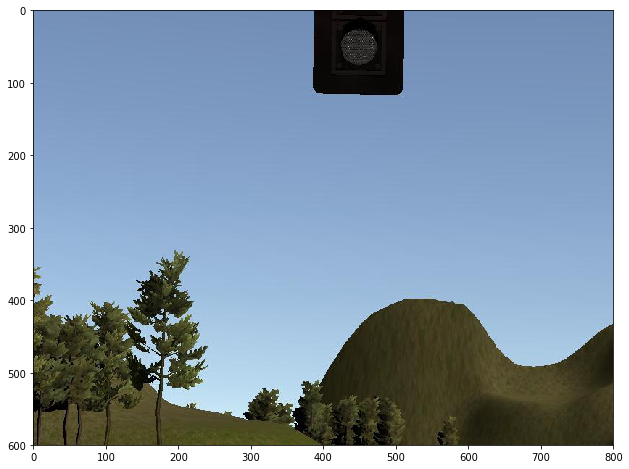

0.002550028
Red
0.0018752876
Red
0.0016387022
Red
0.0014784639
Red
0.0013558138
Red
0.0012544803
Red
1.5613443e-05
off
1.3407926e-05
off
1.2669217e-05
off
1.2472677e-05
Yellow


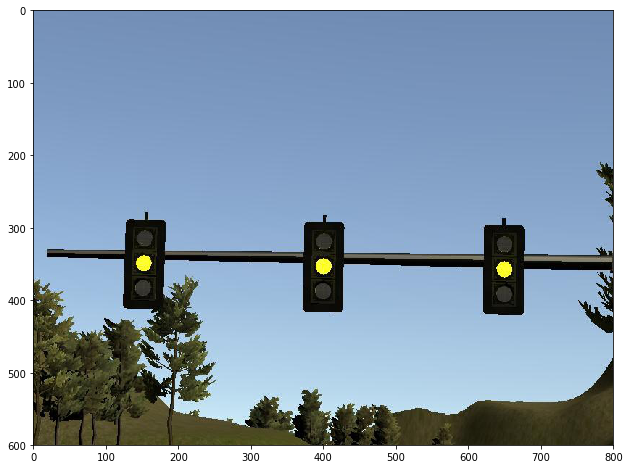

0.13217779
Red
0.07509967
Red
0.003049323
Red
0.0015327787
Red
0.0012137977
Red
0.0009978926
Red
0.00094706204
Red
0.00063118286
Red
0.00046922892
Green
0.00028592252
Yellow


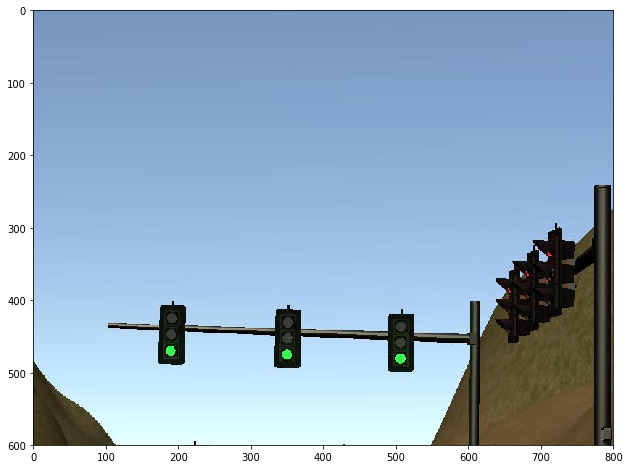

0.0051253494
Red
0.0012779672
Red
0.0010677332
Red
0.00097354053
Red
0.00087879976
Red
0.0008207164
Red
3.2057374e-05
off
2.8177363e-05
Yellow
1.4615031e-05
Green
9.980484e-06
Yellow


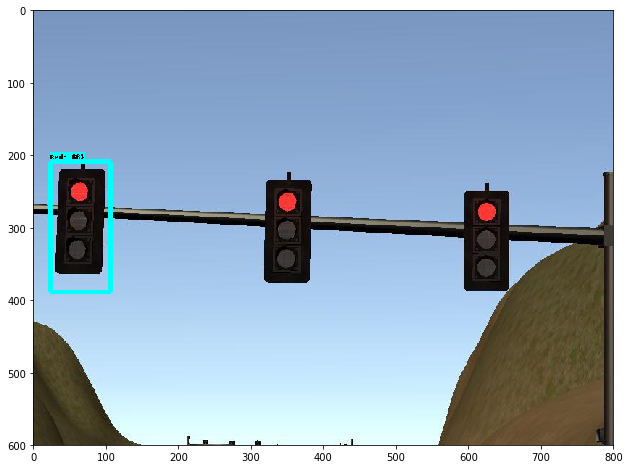

0.66016424
Red
Red 0.66016424
Distance (metres) 0.0
Time in milliseconds 156.6617488861084 

0.2733391
Red
0.09783877
Red
0.0072616804
Red
0.003751847
Green
0.0023269902
Yellow
0.0021465146
Red
0.0021230914
Red
0.0019641283
off
0.0011238147
Green


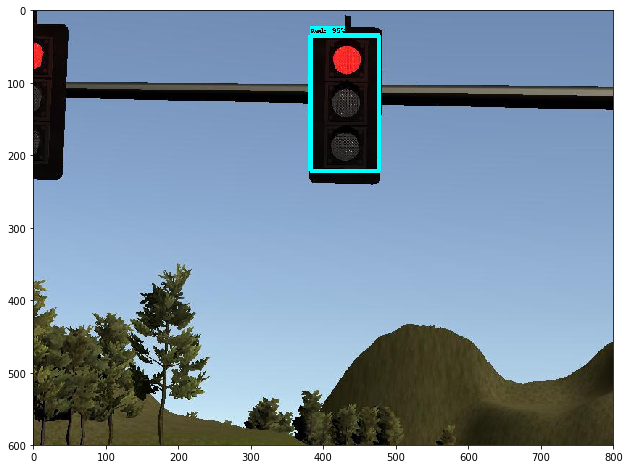

0.95595104
Red
Red 0.95595104
Distance (metres) 0.0
Time in milliseconds 154.03270721435547 

0.008259007
Yellow
0.0079923
Red
0.005916778
Green
0.0053737224
Red
0.005174829
Red
0.0042050993
off
0.0025981525
Red
0.0022178942
Red
0.0014163895
Red


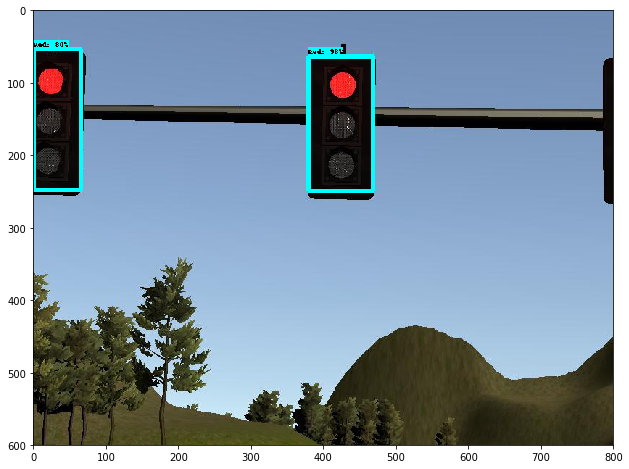

0.9630203
Red
Red 0.9630203
Distance (metres) 0.0
Time in milliseconds 154.77728843688965 

0.80958927
Red
Red 0.80958927
Distance (metres) 0.0
Time in milliseconds 154.77728843688965 

0.0060071195
Green
0.005629718
Yellow
0.0053342767
Red
0.005301415
Yellow
0.0046963356
off
0.004529717
Green
0.0030537648
off
0.0028325536
Green


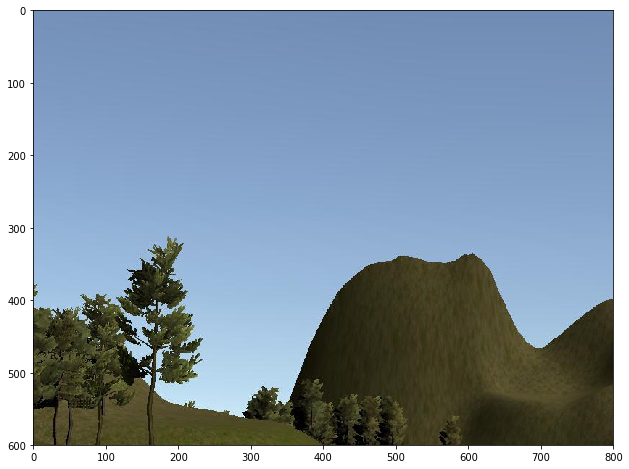

0.0026449922
Red
0.0017536164
Red
0.0010195513
Red
0.0010140167
Red
0.0010118717
Red
0.0009381498
Red
1.5064108e-05
off
1.2570847e-05
off
1.1609953e-05
Yellow
9.3278995e-06
Yellow


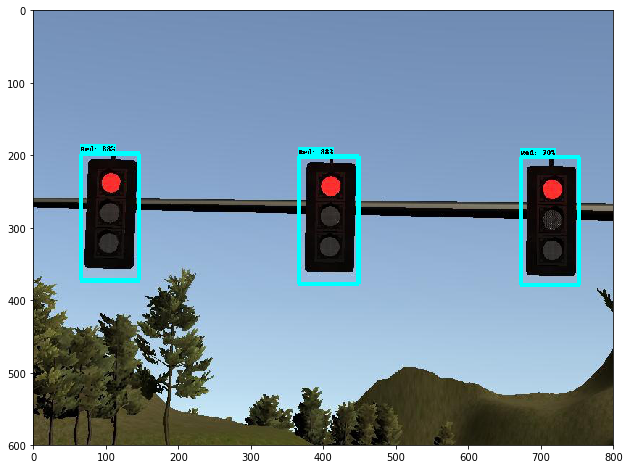

0.88627994
Red
Red 0.88627994
Distance (metres) 0.0
Time in milliseconds 154.6487808227539 

0.8859469
Red
Red 0.8859469
Distance (metres) 0.0
Time in milliseconds 154.6487808227539 

0.7071363
Red
Red 0.7071363
Distance (metres) 0.0
Time in milliseconds 154.6487808227539 

0.008435874
Red
0.006394801
Red
0.004964156
Green
0.0039144983
Green
0.0037135023
Red
0.0035243204
Yellow
0.0028869393
Green


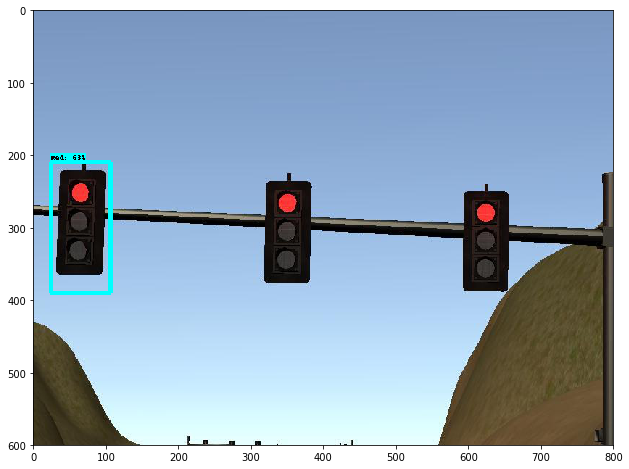

0.63546354
Red
Red 0.63546354
Distance (metres) 0.0
Time in milliseconds 154.52241897583008 

0.2805051
Red
0.09354859
Red
0.0070693074
Red
0.0034852072
Green
0.002203784
Yellow
0.0021971236
Red
0.0021434024
Red
0.0017829646
off
0.0010962167
Green


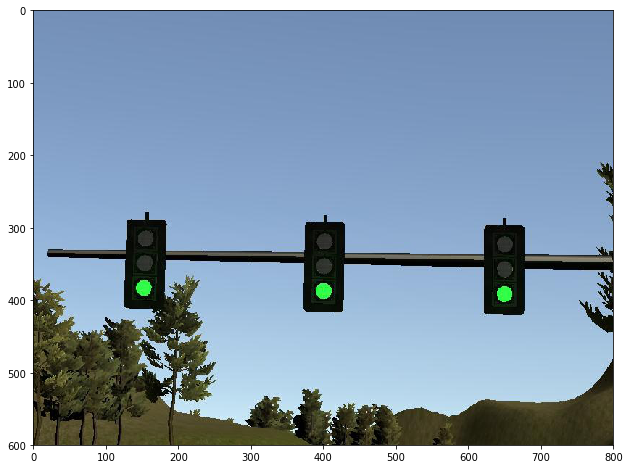

0.09670964
Red
0.002506583
Red
0.0019077306
Red
0.0015123797
Red
0.0009914921
Red
0.0006080291
Red
0.0002803715
Green
0.00021765623
Yellow
0.00019542087
off
1.4134593e-05
Yellow


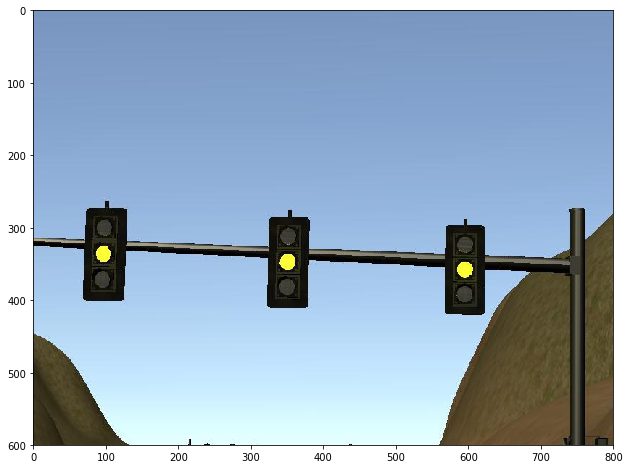

0.3526805
Red
0.14978354
Red
0.100354105
Red
0.0032680759
Red
0.0029403018
Red
0.0016865856
Green
0.0011018028
Red
0.0010280634
Red
0.0010196213
Yellow
0.0009621374
off


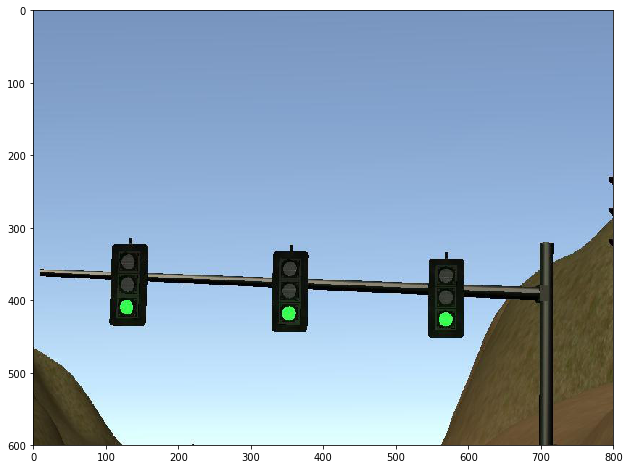

0.16407055
Red
0.07815538
Red
0.003265948
Red
0.0015576793
Red
0.0010372557
Red
0.0010240682
Red
0.0007370655
Green
0.000624711
Red
0.0005263663
off
0.0005148776
Yellow


In [13]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
#             print(classes)
#             print(scores)
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            min_score_thresh = .50
            for i in range(boxes.shape[0]):
                print(scores[i])
                print(category_index[classes[i]]['name'])
                if scores is None or scores[i] > min_score_thresh:

                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  0.97428
                    fy =  1.73205
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )

                    estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                    print("Distance (metres)", estimated_distance)
                    print("Time in milliseconds", (time1 - time0) * 1000, "\n") 

### 2.2 Testing model trained on real images on Real World images

In [12]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
  od_graph_def = tf.GraphDef()

  with tf.gfile.GFile(faster_rcnn_model, 'rb') as fid:
        
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [36]:
PATH_TO_TEST_IMAGES_DIR = 'test_images_udacity'
print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))

test_images_udacity/*.jpg


In [37]:
# PATH_TO_TEST_IMAGES_DIR = '../dataset_train_rgb/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag'
# print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))
# TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))

In [38]:
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
import random
# TEST_IMAGE_PATHS = random.sample(TEST_IMAGE_PATHS, 5)

Length of test images: 9


[1.5688124e-12 1.2966727e-12 4.1443753e-13 1.2661419e-13 1.1827858e-13
 1.1482861e-13 8.0153955e-14 7.2563212e-14 5.7603268e-14 4.9806903e-14] [2 2 2 2 2 2 2 2 4 4]


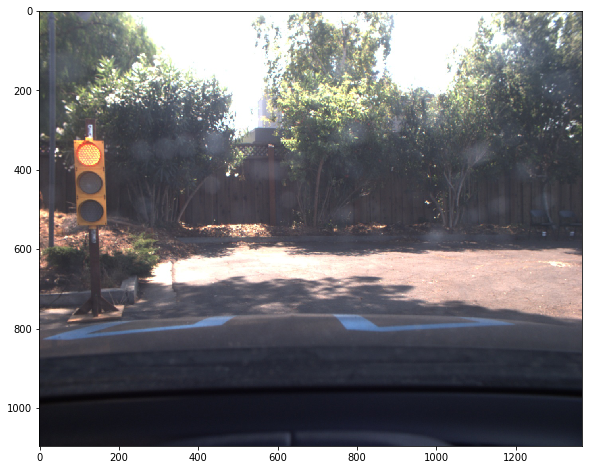

[5.5790077e-12 2.8254206e-13 1.4440638e-13 1.2378029e-13 1.2198219e-13
 1.1627285e-13 8.3095023e-14 7.1205472e-14 6.3945641e-14 5.9752550e-14] [2 2 2 2 2 4 2 2 2 2]


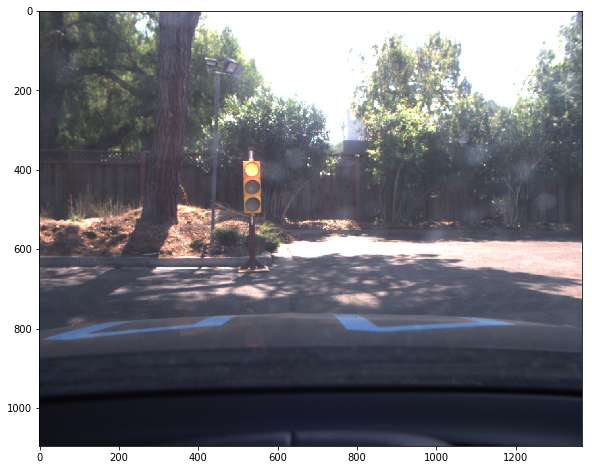

[1.47130179e-13 1.01616733e-13 5.60619192e-14 4.59079016e-14
 3.70418756e-14 3.58683352e-14 2.45359187e-14 9.04711486e-15
 7.34401028e-15 4.89255717e-15] [2 2 2 2 2 2 2 2 2 2]


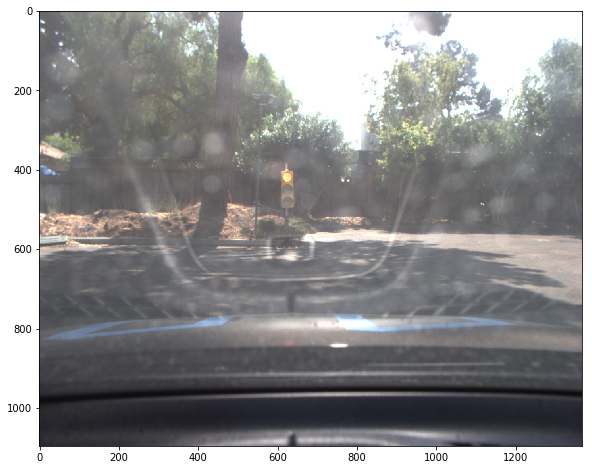

[2.0623527e-13 2.0325644e-13 9.5306169e-14 7.1421744e-14 7.0016679e-14
 5.9428963e-14 4.4379173e-14 3.1686195e-14 1.6438113e-14 1.1754468e-14] [2 2 2 2 2 2 2 2 2 2]


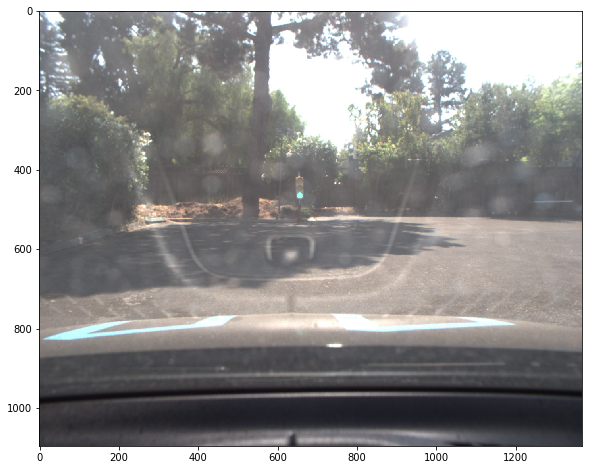

[4.7603306e-13 1.9848287e-13 1.9063825e-13 1.6750411e-13 1.4709145e-13
 1.4705835e-13 9.2744111e-14 6.9878192e-14 5.0310166e-14 3.5864026e-14] [2 2 2 2 2 2 2 2 2 2]


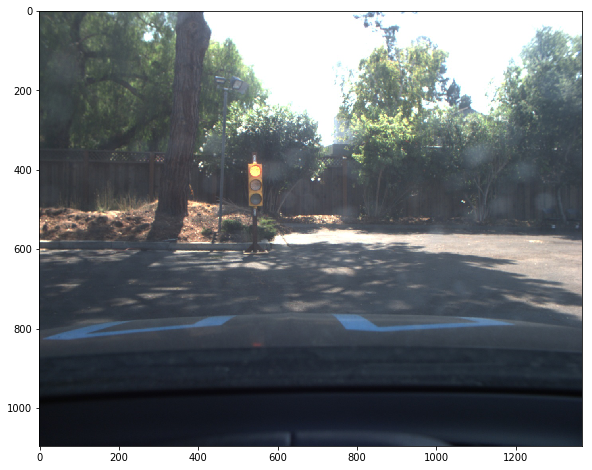

[3.6169902e-12 2.8443724e-13 2.2805447e-13 1.8926946e-13 1.5375586e-13
 8.9340631e-14 8.8676665e-14 7.7762890e-14 7.6797726e-14 4.4717011e-14] [2 2 2 2 2 2 2 4 2 2]


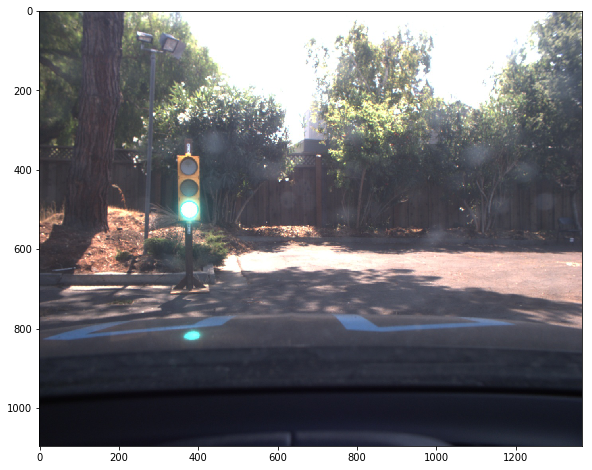

[4.0230406e-12 3.3683718e-12 3.1916158e-13 1.9999153e-13 1.9136979e-13
 1.5429670e-13 1.1318298e-13 9.9383460e-14 6.4038035e-14 6.0093261e-14] [2 2 2 4 4 2 2 2 2 2]


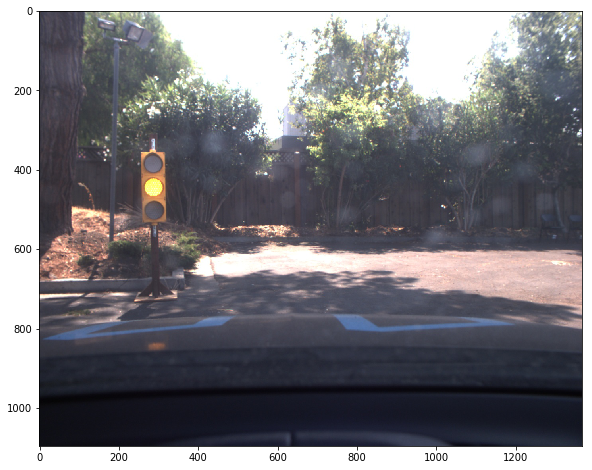

[2.5264762e-13 7.4420857e-14 4.4540550e-14 4.4522118e-14 3.3756814e-14
 2.4048365e-14 2.1142007e-14 1.7949628e-14 1.3316076e-14 1.2892852e-14] [2 2 2 2 2 2 2 2 2 2]


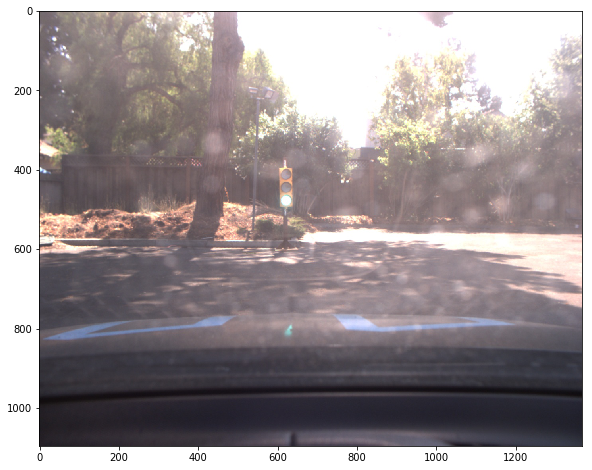

[8.8869277e-12 2.3083746e-12 3.2421114e-13 2.7815158e-13 1.6667996e-13
 1.4853493e-13 1.4462304e-13 1.0092753e-13 9.0468438e-14 8.6487424e-14] [2 2 2 4 2 2 4 2 2 2]


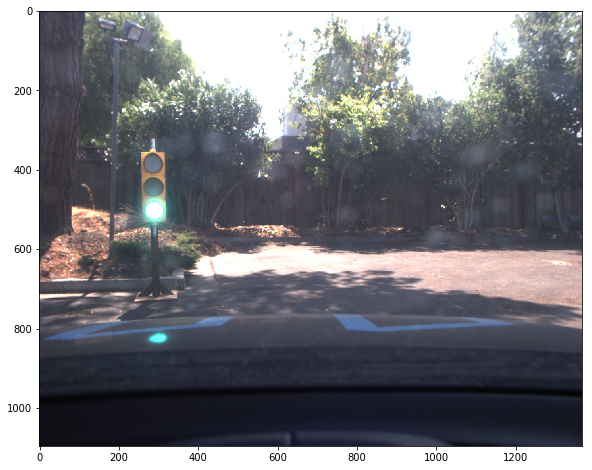

In [40]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
            print(scores, classes)
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

            min_score_thresh = .50
            for i in range(boxes.shape[0]):
                if scores is None or scores[i] > min_score_thresh:
                
                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  1345.200806
                    fy =  1353.838257
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )

                    estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                    print("Distance (metres)", estimated_distance)
                    print("Time in milliseconds", (time1 - time0) * 1000, "\n")